GRIP TASK 

#GRIPMAY21

Prediction using Supervised ML


Task : Predict the percentage of an student based on the no. of study hours.



Shah Minhal Fida


In [1]:
# importing the libraries required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Reading the dataset through url
url = "http://bit.ly/w-data"
s_df = pd.read_csv(url)
s_df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [14]:
#checking for null values
s_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [15]:
#Pulling some information
s_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


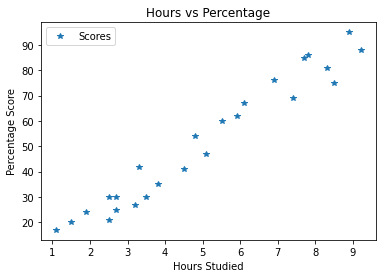

In [17]:
#plotting data points
s_df.plot(x='Hours', y='Scores', style='*') 
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [18]:
hours = s_df.iloc[:,:-1].values
scores = s_df.iloc[:, 1].values

In [19]:
# Splitting the data into training and test set
hours_train, hours_test, scores_train, scores_test = train_test_split(hours, scores, train_size = 0.8)

# Training the data using linear regression
lg = LinearRegression()
lg.fit(hours_train, scores_train)

LinearRegression()

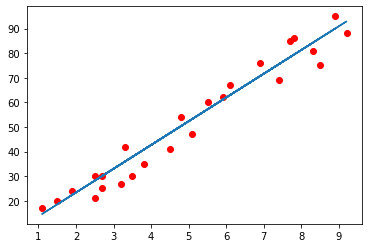

In [20]:
# Plotting the regression line
line = lg.coef_ * hours + lg.intercept_

# Plotting the test data
plt.scatter(hours, scores, color='r')
plt.plot(hours, line);
plt.show()

In [21]:
# Predicting the scores
scores_predict = lg.predict(hours_test)

In [22]:
# Comparing the actual data with predicted data
df = pd.DataFrame({'Actual':scores_test, 'Predicted':scores_predict})
df

,Actual,Predicted
0,21,28.173803
1,25,30.106417
2,35,40.735789
3,95,90.017427
4,75,86.152200


In [24]:
# Predicting score for the 9.25 hours
hours = 9.25
prediction = lg.predict([[hours]])
print("Number of hours = {}".format(hours))
print("Predicted Score = {}".format(prediction[0]))

Number of hours = 9.25
Predicted Score = 93.39949968674881


In [25]:
# Evaluating the performance of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(scores_test, scores_predict))

Mean Absolute Error: 6.830156536730371
